In [20]:
import pandas as pd
import matplotlib.pyplot as plt


df =pd.read_csv('coffee_shop_sales.csv')
df.head()
# print(df.shape())
# df.shape
# df.info()
# print(df.isnull().sum())
# print(df.duplicated().sum())
# df.drop('transaction_id',axis=1,inplace=True)

In [21]:
# df.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


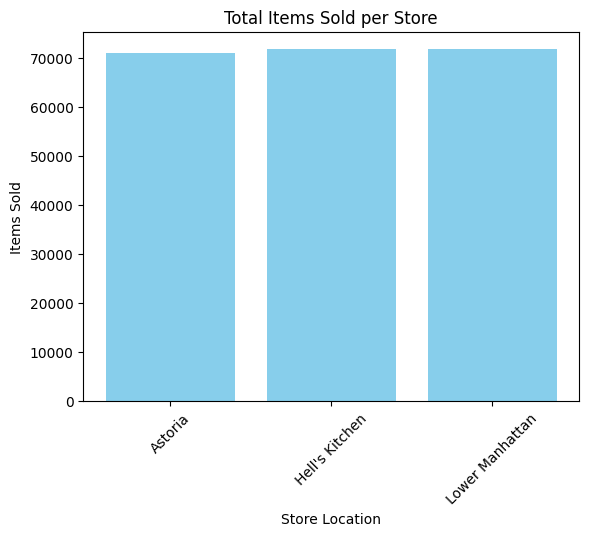

In [23]:
import matplotlib.pyplot as plt

store_sales = df.groupby('store_location')['transaction_qty'].sum()

plt.bar(store_sales.index, store_sales.values, color='skyblue')
plt.title("Total Items Sold per Store")
plt.xlabel("Store Location")
plt.ylabel("Items Sold")
plt.xticks(rotation=45)
plt.show()


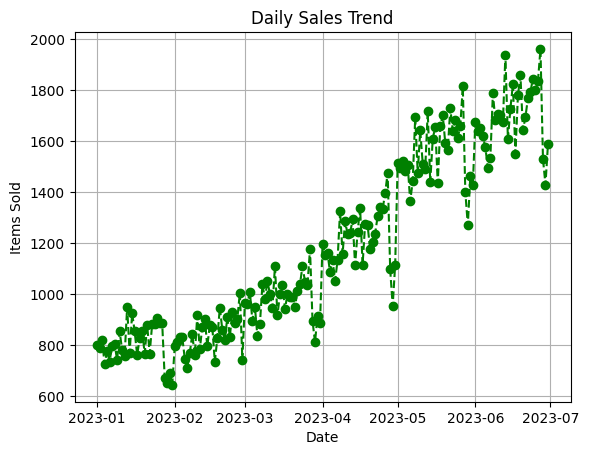

In [24]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
daily_sales = df.groupby('transaction_date')['transaction_qty'].sum()

plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='--', color='green')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Items Sold")
plt.grid(True)
plt.show()


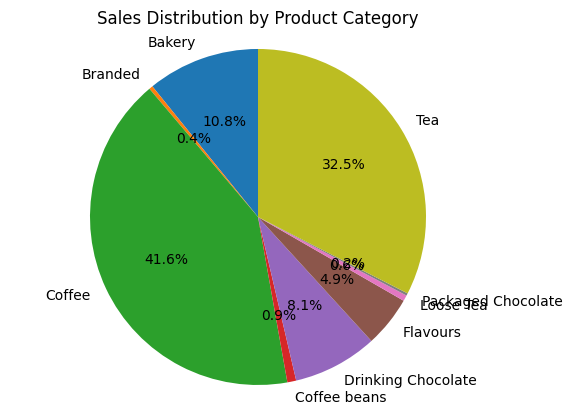

In [25]:
category_sales = df.groupby('product_category')['transaction_qty'].sum()

plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Product Category")
plt.axis('equal')
plt.show()


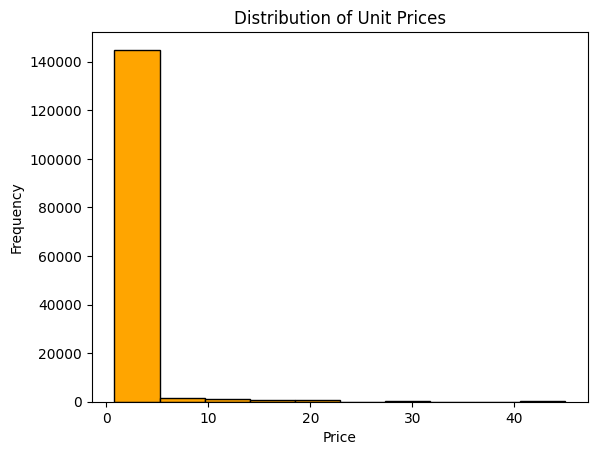

In [26]:
plt.hist(df['unit_price'], bins=10, color='orange', edgecolor='black')
plt.title("Distribution of Unit Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


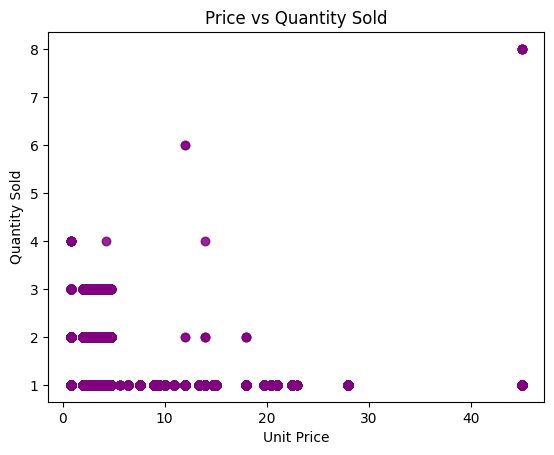

In [27]:
plt.scatter(df['unit_price'], df['transaction_qty'], alpha=0.6, color='purple')
plt.title("Price vs Quantity Sold")
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.show()


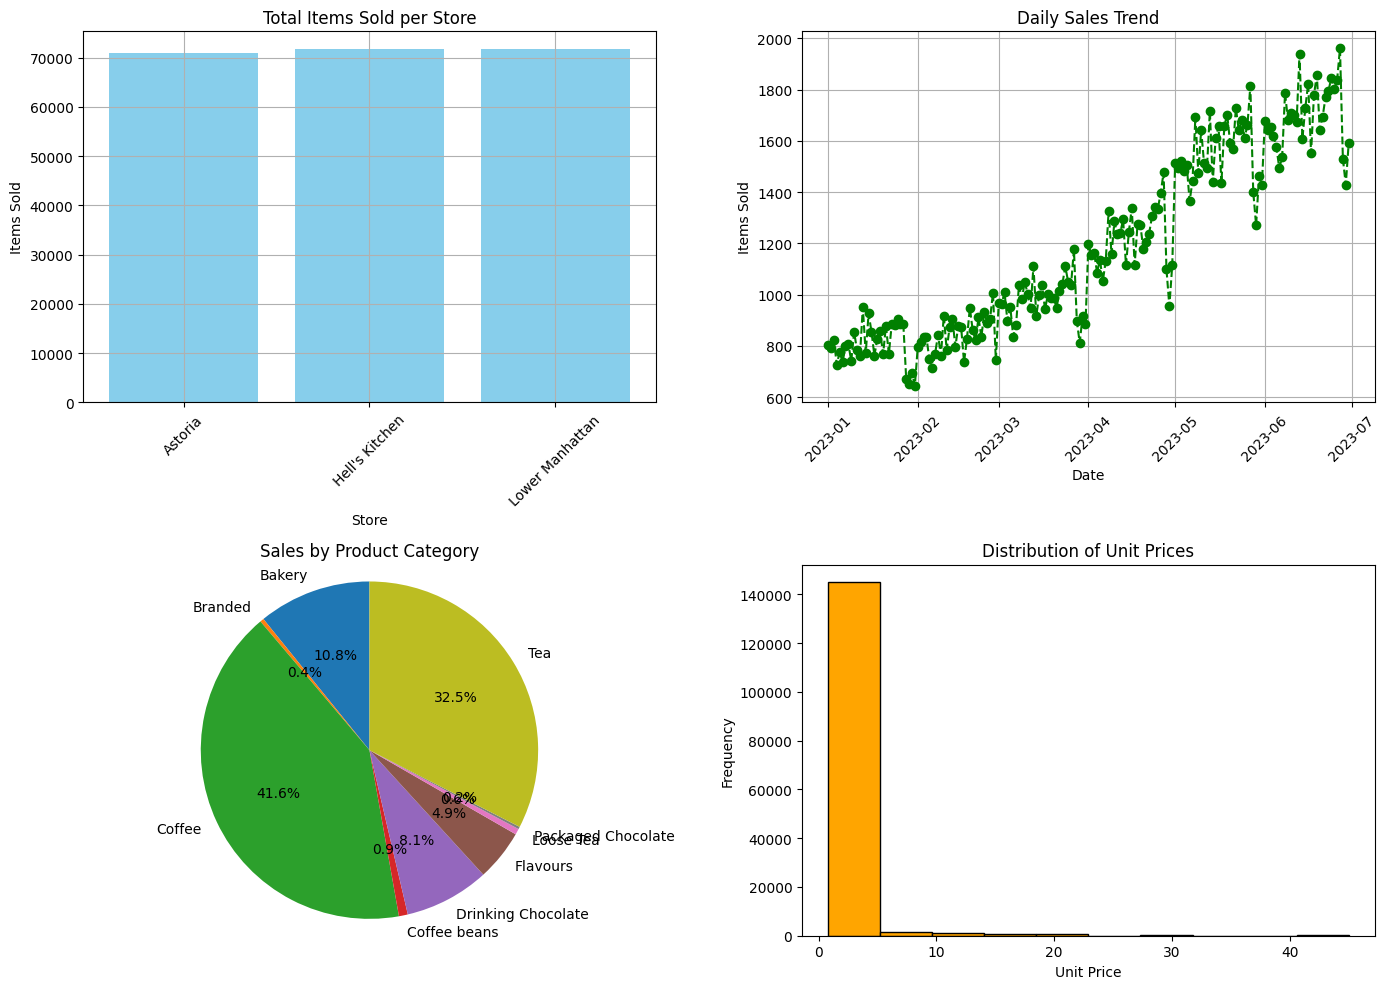

In [38]:

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Prepare data for plots
store_sales = df.groupby('store_location')['transaction_qty'].sum()
daily_sales = df.groupby('transaction_date')['transaction_qty'].sum()
category_sales = df.groupby('product_category')['transaction_qty'].sum()
unit_prices = df['unit_price']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Bar Chart
axs[0, 0].bar(store_sales.index, store_sales.values, color='skyblue')
axs[0, 0].set_title("Total Items Sold per Store")
axs[0, 0].set_xlabel("Store")
axs[0, 0].set_ylabel("Items Sold")
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

# Line Chart
axs[0, 1].plot(daily_sales.index, daily_sales.values, marker='o', linestyle='--', color='green')
axs[0, 1].set_title("Daily Sales Trend")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Items Sold")
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)

# Pie Chart
axs[1, 0].pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title("Sales by Product Category")
axs[1, 0].axis('equal')

# Histogram
axs[1, 1].hist(unit_prices, bins=10, color='orange', edgecolor='black')
axs[1, 1].set_title("Distribution of Unit Prices")
axs[1, 1].set_xlabel("Unit Price")
axs[1, 1].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('coffee_shop_sales_plots.png', dpi=300, bbox_inches='tight')
plt.show()
